In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [12]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [ ]:
df.isnull().sum()


Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [13]:
cdf = df[['SqFt','Bedrooms','Bathrooms','Price']]
cdf.head(9)

,SqFt,Bedrooms,Bathrooms,Price
0,1790,2,2,114300
1,2030,4,2,114200
2,1740,3,2,114800
3,1980,3,2,94700
4,2130,3,3,119800
5,1780,3,2,114600
6,1830,3,3,151600
7,2160,4,2,150700
8,2110,4,2,119200


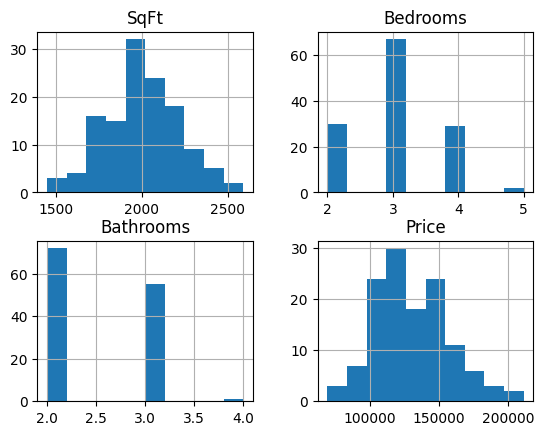

In [14]:
viz = cdf[['SqFt','Bedrooms','Bathrooms','Price']]
viz.hist()
plt.show()

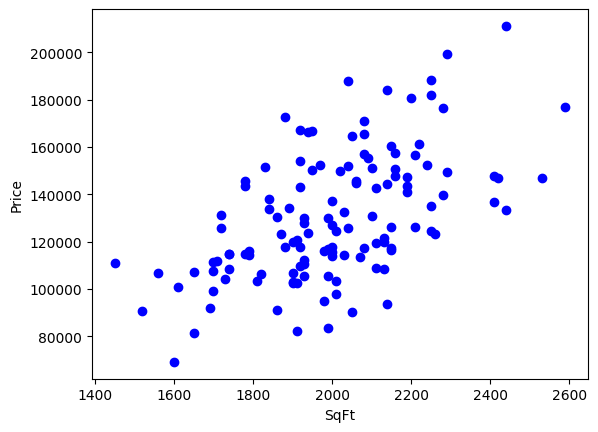

In [15]:
plt.scatter(cdf.SqFt, cdf.Price, color='blue')
plt.xlabel("SqFt")
plt.ylabel("Price")
plt.show()


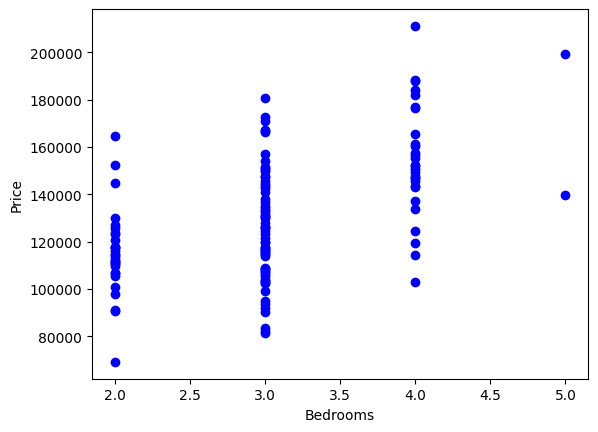

In [16]:
plt.scatter(cdf.Bedrooms, cdf.Price, color='blue')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

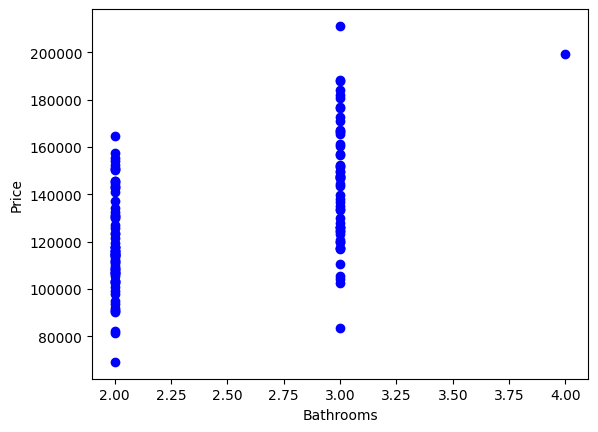

In [17]:
plt.scatter(cdf.Bathrooms, cdf.Price, color='blue')
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

In [18]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

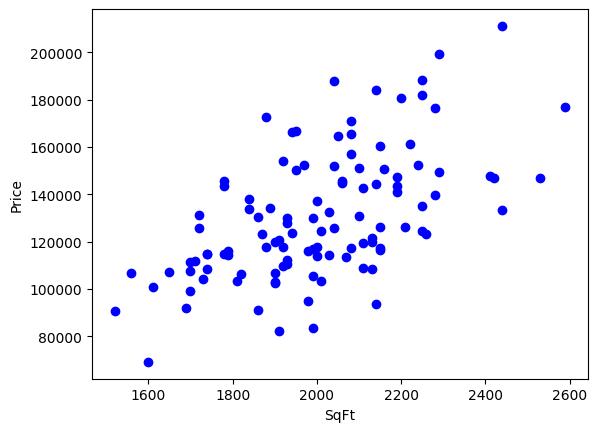

In [19]:
plt.scatter(train.SqFt, train.Price , color="blue")
plt.xlabel("SqFt")
plt.ylabel("Price")
plt.show()

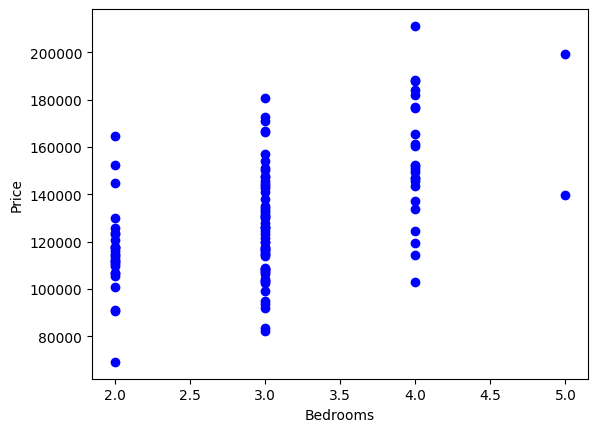

In [20]:
plt.scatter(train.Bedrooms, train.Price, color="blue")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

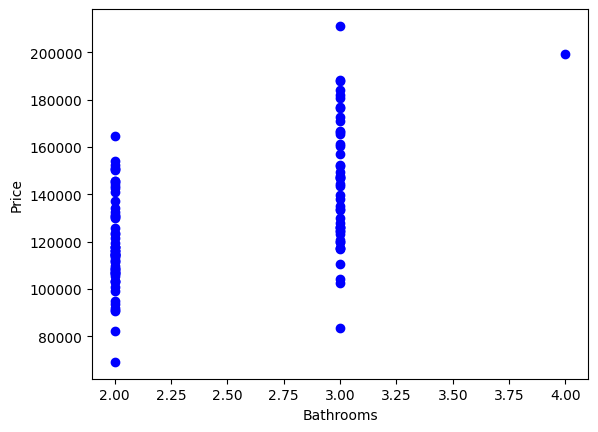

In [21]:
plt.scatter(train.Bathrooms, train.Price, color="blue")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SqFt']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[72.85519853]]
Intercept:  [-15363.92930169]


In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Bedrooms']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[19304.48992059]]
Intercept:  [72521.62492364]


In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Bathrooms']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[27381.90709046]]
Intercept:  [63511.00244499]


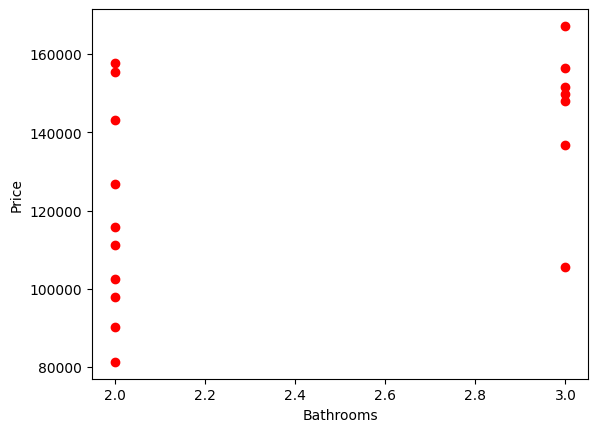

In [25]:
plt.scatter(test.Bathrooms, test.Price, color="red")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
test_x = np.asanyarray(test[['Bathrooms']])
test_y = np.asanyarray(test[['Price']])
regr.fit(test_x, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[26887.14285714]]
Intercept:  [64395.71428571]


Text(0, 0.5, 'Price')

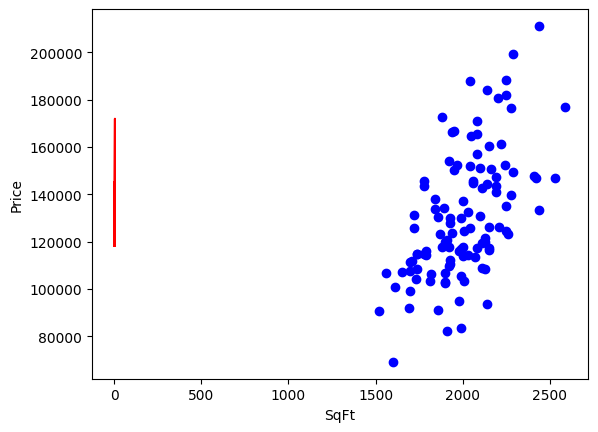

In [27]:
plt.scatter(train.SqFt, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SqFt")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

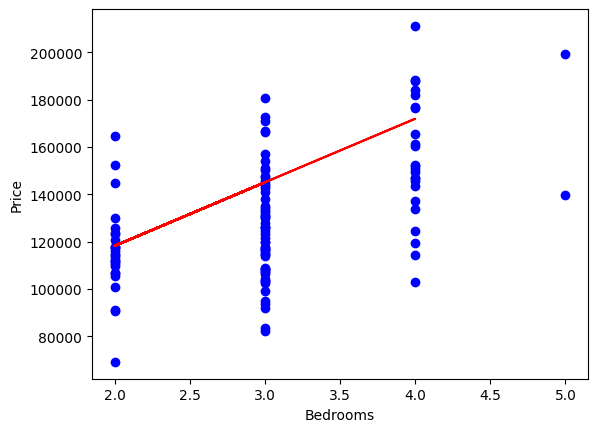

In [28]:
plt.scatter(train.Bedrooms, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Bedrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

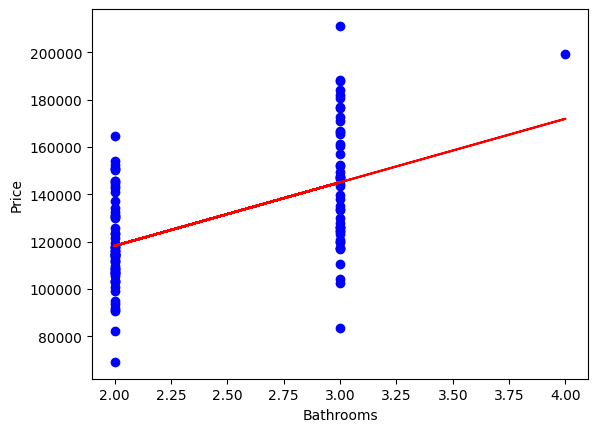

In [29]:
plt.scatter(train.Bathrooms, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Bathrooms")
plt.ylabel("Price")

In [38]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Bedrooms','Bathrooms']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 16088.77
Residual sum of squares (MSE): 392873910.30
R2-score: 0.43
